# in some plots we are having 1 EOS with no SOS.

Why nullify function did not work?


<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="how_did_this_happen.png" width="520">
    <br>
    <em style="color: grey">1</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="how_did_this_happen_2.png" width="520">
    <br>
    <em style="color: grey">2</em>
  </p> 
</td>
</tr></table>

In [2]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

In [3]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')

import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

data_dir = "/Users/hn/Documents/01_research_data/remote_sensing/test_Aeolus_data/"


In [4]:
eleven_colors = ["gray", "lightcoral", "red", "peru",
                 "darkorange", "gold", "olive", "green",
                 "blue", "violet", "deepskyblue"]

indeks = "EVI"
given_county = "Benton"
SF_year = 2018
sos_thresh = 0.3
eos_thresh = 0.3
minFinderDetla = 0.4

f_name = "01_Regular_filledGap_" + given_county + "_SF_" +  str(SF_year) + "_EVI.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)


if 'Date' in a_df.columns:
    if type(a_df.Date.iloc[0]) == str:
        a_df['Date'] = pd.to_datetime(a_df.Date.values).values

a_df = a_df[a_df['county'] == given_county.replace("_", " ")] # Filter Grant
# a_df = rc.filter_out_NASS(a_df) # Toss NASS
# a_df = rc.filter_by_lastSurvey(a_df, year = SF_year) # filter by last survey date
a_df['SF_year'] = SF_year

if not('DataSrc' in a_df.columns):
    print ("Data source is being set to NA")
    a_df['DataSrc'] = "NA"

if not('CovrCrp' in a_df.columns):
    print ("CovrCrp is being set to NA")
    a_df['CovrCrp'] = "NA"
    
print (a_df.shape)

CovrCrp is being set to NA
(549321, 23)


In [5]:
fields_of_interest = ["1462_WSDA_SF_2018", "5668_WSDA_SF_2018"]

a_df = a_df[a_df.ID.isin(fields_of_interest)]

a_df.ID.unique().tolist()

['5668_WSDA_SF_2018', '1462_WSDA_SF_2018']

In [6]:
a_df.shape

(102, 23)

In [7]:
print (a_df.shape)

a_df = rc.initial_clean(df = a_df, column_to_be_cleaned = indeks)

an_EE_TS = a_df.copy()

print (an_EE_TS.shape)

### List of unique polygons
polygon_list = np.sort(an_EE_TS['ID'].unique())
print ("_____________________________________")
print("len(polygon_list)")
print (len(polygon_list))
print ("_____________________________________")

counter = 0


(102, 23)
(102, 23)
_____________________________________
len(polygon_list)
2
_____________________________________


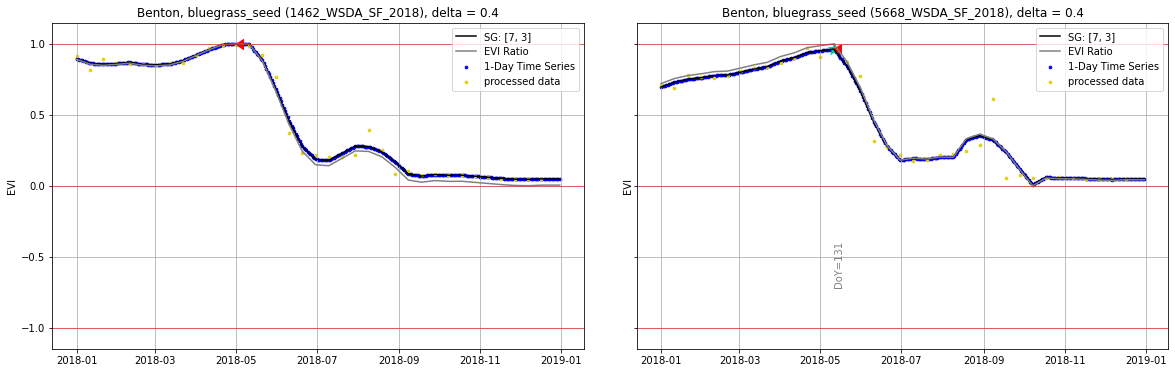

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20,6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True);

field_1 = an_EE_TS[an_EE_TS['ID']==fields_of_interest[0]].copy()
field_1 = field_1[field_1.image_year == SF_year]

field_2 = an_EE_TS[an_EE_TS['ID']==fields_of_interest[1]].copy()
field_2 = field_2[field_2.image_year == SF_year]



idx=indeks
SG_params=[7, 3]
SFYr = SF_year
deltA= minFinderDetla
onset_cut = sos_thresh
offset_cut = eos_thresh 


rcp. SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity_1Year(field_1, 
                                                                  idx, 
                                                                  SG_params, 
                                                                  SFYr, 
                                                                  ax = ax1, 
                                                                  deltA = minFinderDetla, 
                                                                  onset_cut=sos_thresh, 
                                                                  offset_cut=eos_thresh)

rcp. SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity_1Year(field_2,
                                                                  idx=indeks, 
                                                                  SG_params=SG_params, 
                                                                  SFYr = SF_year, ax=ax2, deltA= minFinderDetla,
                                                                  onset_cut = sos_thresh, 
                                                                  offset_cut = eos_thresh);

In [9]:
dataAB = an_EE_TS[an_EE_TS['ID']==fields_of_interest[0]].copy()
curr_field = dataAB 
idx = indeks
SG_params=[7, 3]
SFYr = SF_year
deltA = minFinderDetla
onset_cut = sos_thresh
offset_cut = eos_thresh

In [10]:
crr_fld = dataAB.copy()
if (not("human_system_start_time" in list(crr_fld.columns))):
    crr_fld = rc.add_human_start_time(crr_fld)

eleven_colors = ["gray", "lightcoral", "red", "peru",
                 "darkorange", "gold", "olive", "green",
                 "blue", "violet", "deepskyblue"]

plant = crr_fld['CropTyp'].unique()[0]
# Take care of names, replace "/" and "," and " " by "_"
plant = plant.replace("/", "_")
plant = plant.replace(",", "_")
plant = plant.replace(" ", "_")
plant = plant.replace("__", "_")

county = crr_fld['county'].unique()[0]
ID = crr_fld['ID'].unique()[0]

y = crr_fld[idx].copy()

#############################################
###
###             Smoothen
###
#############################################
# differences are minor, but lets keep using Pythons function
# my_savitzky_pred = rc.savitzky_golay(y, window_size=Sav_win_size, order=sav_order)
window_len = SG_params[0]
poly_order = SG_params[1]

SG_pred = scipy.signal.savgol_filter(y, window_length= window_len, polyorder=poly_order)

# SG might violate the boundaries. clip them:
SG_pred[SG_pred > 1 ] = 1
SG_pred[SG_pred < -1 ] = -1

crr_fld[idx] = SG_pred

#############################################
###
###             fine granularity table
###
#############################################
# create the full calenadr to make better estimation of SOS and EOS.
fine_granular_table = rc.create_calendar_table(SF_year = SFYr)
fine_granular_table = pd.merge(fine_granular_table, crr_fld, on=['Date', 'SF_year', 'doy'], how='left')

###### We need to fill the NAs that are created because they were not created in fine_granular_table
fine_granular_table["image_year"] = crr_fld["image_year"].unique()[0]
fine_granular_table["ID"]     = crr_fld["ID"].unique()[0]
fine_granular_table["Acres"]  = crr_fld["Acres"].unique()[0]
fine_granular_table["county"] = crr_fld["county"].unique()[0]

fine_granular_table["CropGrp"] = crr_fld["CropGrp"].unique()[0]
fine_granular_table["CropTyp"] = crr_fld["CropTyp"].unique()[0]
fine_granular_table["DataSrc"] = crr_fld["DataSrc"].unique()[0]
fine_granular_table["ExctAcr"] = crr_fld["ExctAcr"].unique()[0]

fine_granular_table["IntlSrD"] = crr_fld["IntlSrD"].unique()[0]
fine_granular_table["Irrigtn"] = crr_fld["Irrigtn"].unique()[0]

fine_granular_table["LstSrvD"] = crr_fld["LstSrvD"].unique()[0]
fine_granular_table["Notes"]   = crr_fld["Notes"].unique()[0]
fine_granular_table["RtCrpTy"] = crr_fld["RtCrpTy"].unique()[0]
fine_granular_table["Shap_Ar"] = crr_fld["Shap_Ar"].unique()[0]
fine_granular_table["Shp_Lng"] = crr_fld["Shp_Lng"].unique()[0]
fine_granular_table["TRS"] = crr_fld["TRS"].unique()[0]

fine_granular_table = rc.add_human_start_time_by_YearDoY(fine_granular_table)

# replace NAs with -1.5. Because, that is what the function fill_theGap_linearLine()
# uses as indicator for missing values
fine_granular_table.fillna(value={idx:-1.5}, inplace=True)

fine_granular_table = rc.fill_theGap_linearLine(regular_TS = fine_granular_table, 
                                                V_idx=idx, 
                                                SF_year=SFYr)

# update SG_pred so that we do not have to update too many other stuff.
SG_pred = fine_granular_table[idx].values.copy()
crr_fld = fine_granular_table
y = fine_granular_table[idx].copy()

In [11]:
#############################################
###
###   Form a data table of X and Y values
###
#############################################

if len(fine_granular_table['image_year'].unique()) == 2:
    X = rc.extract_XValues_of_2Yrs_TS(fine_granular_table, SF_yr = SFYr)
elif len(fine_granular_table['image_year'].unique()) == 1:
    X = fine_granular_table['doy']

d = {'DoY': X, 'Date': pd.to_datetime(fine_granular_table.human_system_start_time.values).values}
date_df = pd.DataFrame(data=d)

min_val_for_being_peak = 0.5


In [12]:
crr_fld [idx] = SG_pred
crr_fld = rc.addToDF_SOS_EOS_White(pd_TS = crr_fld, 
                                   VegIdx = idx, 
                                   onset_thresh = onset_cut, 
                                   offset_thresh = offset_cut)

In [13]:
###
### Null_SOS_EOS_by_DoYDiff(pd_TS, min_season_length=40)
###
pd_TS = crr_fld.copy()
min_season_length=40

In [14]:
pd_TS_DoYDiff = pd_TS.copy()

# find indexes of SOS and EOS
SOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['SOS'] != 0].tolist()
EOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['EOS'] != 0].tolist()

In [15]:
SOS_indexes

[]

In [16]:
EOS_indexes

[168]

In [17]:
crr_fld.head(2)

,Date,SF_year,doy,ID,Acres,county,CropGrp,CropTyp,DataSrc,ExctAcr,...,Shp_Lng,TRS,image_year,EVI,human_system_start_time,system_start_time,CovrCrp,EVI_ratio,SOS,EOS
0,2018-01-01,2018,1,1462_WSDA_SF_2018,90,Benton,Seed,bluegrass seed,producer,89.923892,...,2323.623554,T06R25E14,2017,0.904727,2017-01-01,1.514848e+12,NA,0.900310,0.0,0.0
1,2018-01-02,2018,2,1462_WSDA_SF_2018,90,Benton,Seed,bluegrass seed,producer,89.923892,...,2323.623554,T06R25E14,2017,0.903446,2017-01-02,NaN,NaN,0.898969,0.0,0.0


In [18]:
crr_fld['Date'] = crr_fld.human_system_start_time
crr_fld = rc.Null_SOS_EOS_by_DoYDiff(pd_TS = crr_fld, min_season_length=40)

In [19]:
pd_TS_DoYDiff = crr_fld.copy()

# find indexes of SOS and EOS
SOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['SOS'] != 0].tolist()
EOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['EOS'] != 0].tolist()

In [20]:
SOS_indexes

[]

In [21]:
EOS_indexes

[]

# Examine Null_SOS_EOS_by_DoYDiff

In [111]:
pd_TS = crr_fld.copy()

In [124]:
pd_TS_DoYDiff = pd_TS.copy()

# find indexes of SOS and EOS
SOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['SOS'] != 0].tolist()
EOS_indexes = pd_TS_DoYDiff.index[pd_TS_DoYDiff['EOS'] != 0].tolist()

In [125]:
len(SOS_indexes) == 0 and len(EOS_indexes) == 0

False

In [126]:
EOS_indexes 

[168]

In [127]:
EOS_indexes

[168]